In [1]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import sys
from plotting_setup import *


sys.path.append('../pipeline_scripts/')
from pipeline_main import pipeline
from pipeline_stress import L_transport
from pipeline_1D import to_1D



Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:17<00:00, 231.64it/s]


Converged mean angular momentum vector after 1 iteration(s)
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:01<00:00, 2294.84it/s]


Disk size: 64.4 au
Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:01<00:00, 3012.01it/s]


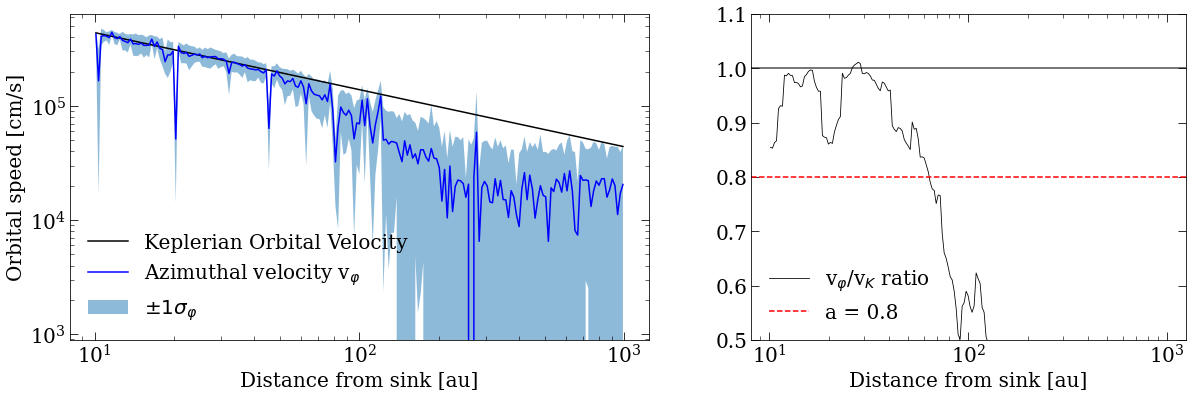

In [2]:
data = pipeline(snap = 362, run = 'sink13fmr05', sink_id=13)
data.recalc_L(verbose = 1); 
data.calc_disksize(plot = True); data.calc_trans_xyz()

Looping through patches to extract densities and heights
Fitting surface density and scaleheight in each radial bin


100%|██████████| 99/99 [00:03<00:00, 29.63it/s]


Validating fit...


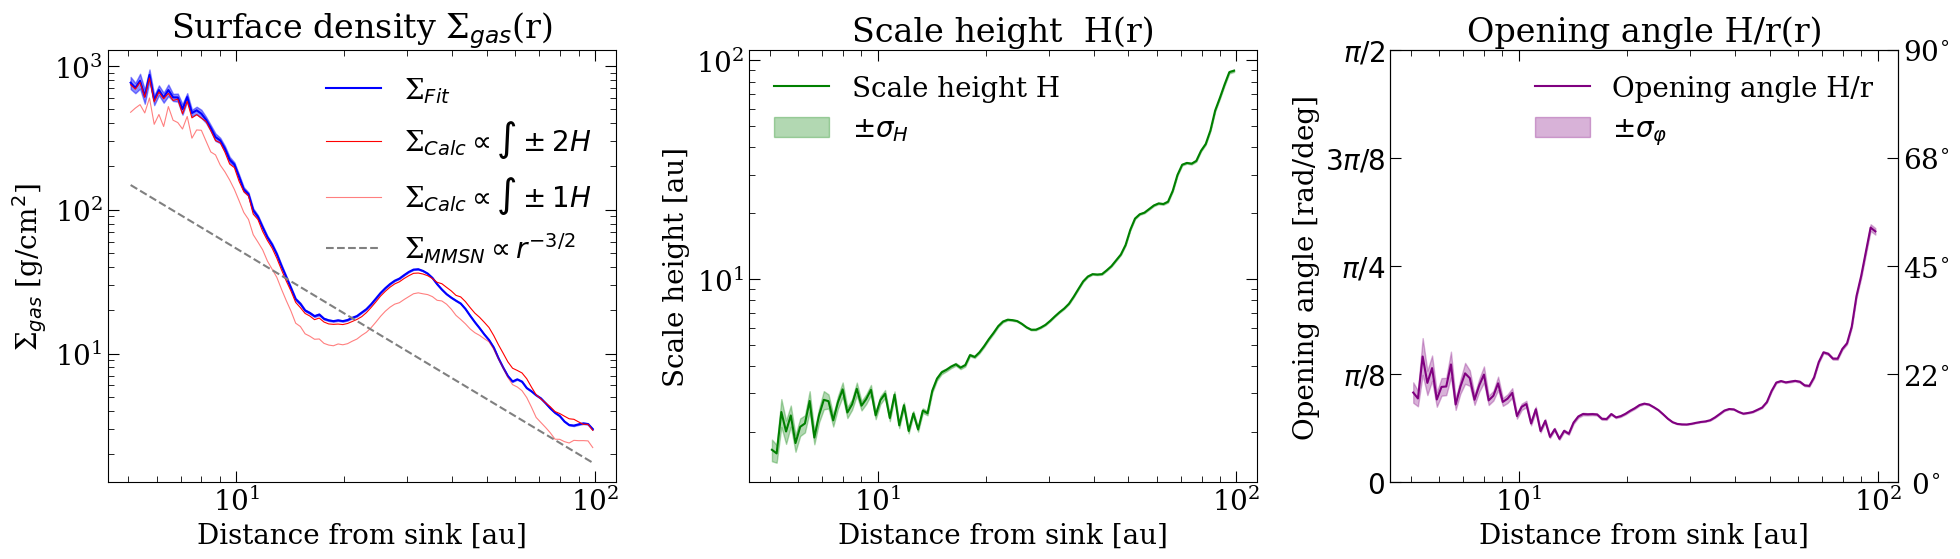

In [4]:
data.to_1D()

In [5]:
H, _ = data.H_1D[np.argmin(abs(data.r_1D * data.au_length - 30))] 

Using 507 patches to retrive angular momentum change
Calculating radial part
Radial 2D histogram not completely covered
Ratio of nan-valued cells to be filled by interpolation: 44.61 %
Calculating vertical part
Vertical (top) 2D histogram not completely covered
Vertical (bottom) 2D histogram not completely covered
Calculating vertical part
Calculating total angular momentum within the cylinder
Stresses for radius = 30 au, height = 60 au
Order of stresses: ['Reynolds', 'Maxwells', 'Grav. instability', 'Total'] 
0: Radial
1: Vertical
2: Total angular momentum
All values are givin in cgs-units


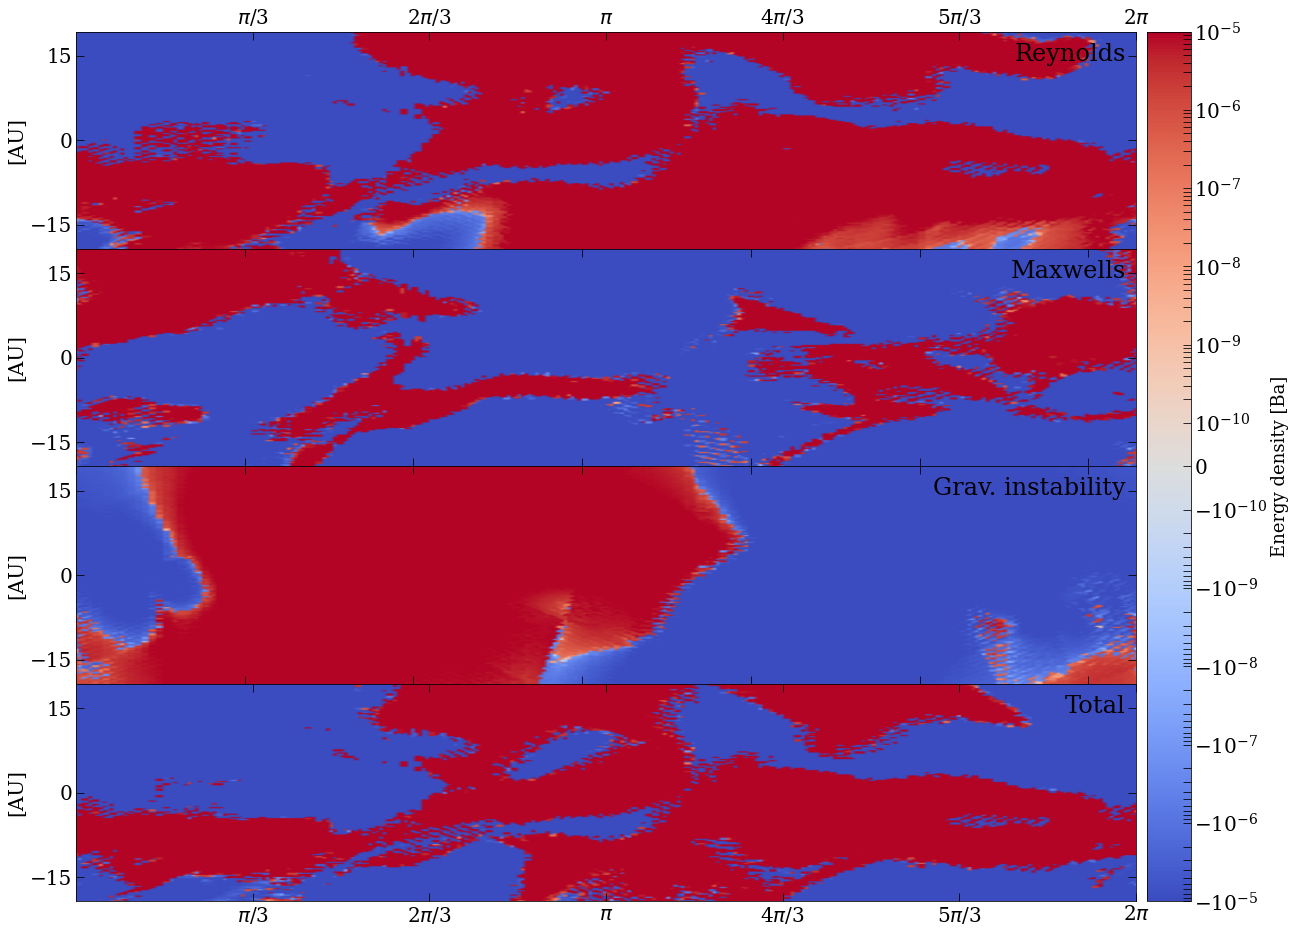

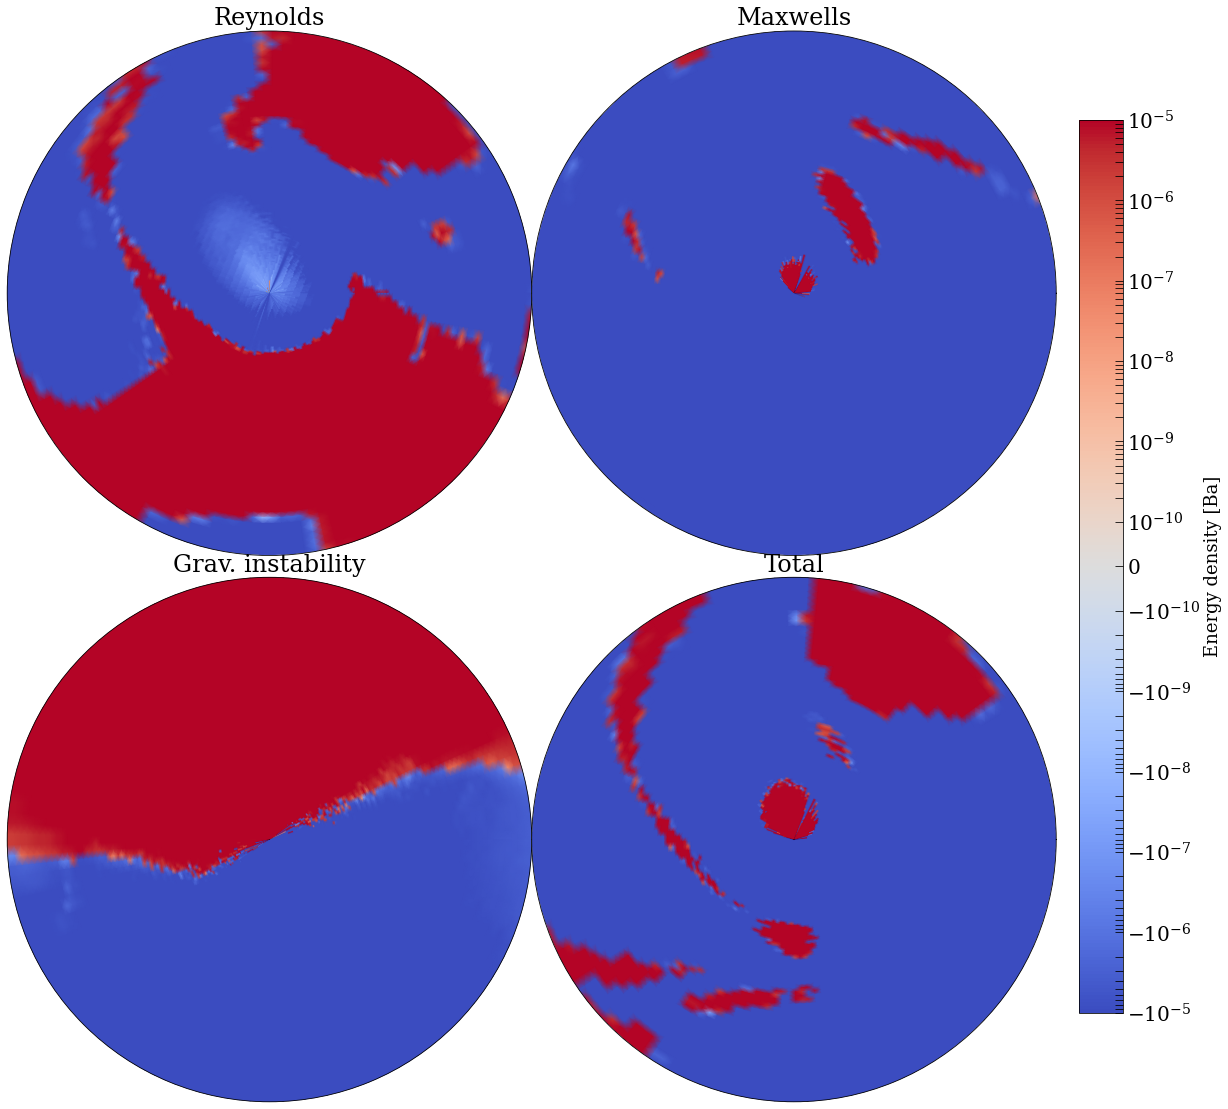

In [14]:
data.L_transport(radius=30, height = 3 * H, plot = True, Nh = 200, N_phi = 300, refine_grid = 1)
stress_data = data.get_stresses()

In [15]:
stress_data.keys()

dict_keys(['reynolds_r', 'maxwell_r', 'grav_r', 'reynolds_v', 'maxwell_v', 'grav_v', 'vertical_phi', 'vertical_r', 'radial_phi', 'radial_z', 'Integrated components R', 'Integrated components V', 'L_total'])

In [16]:
R_r, M_r, G_r = [item for item in list(stress_data.values())[:3]]; total_r = np.array([R_r, M_r, G_r]).sum(axis = 0)
R_v, M_v, G_v = [item for item in list(stress_data.values())[3:6]]; total_v = np.array([R_v, M_v, G_v]).sum(axis = 0)

In [17]:
radial_phi = stress_data['radial_phi']
radial_z = stress_data['radial_z']

stress_names = ['Reynolds', 'Maxwells', 'Grav. instability', 'Total']

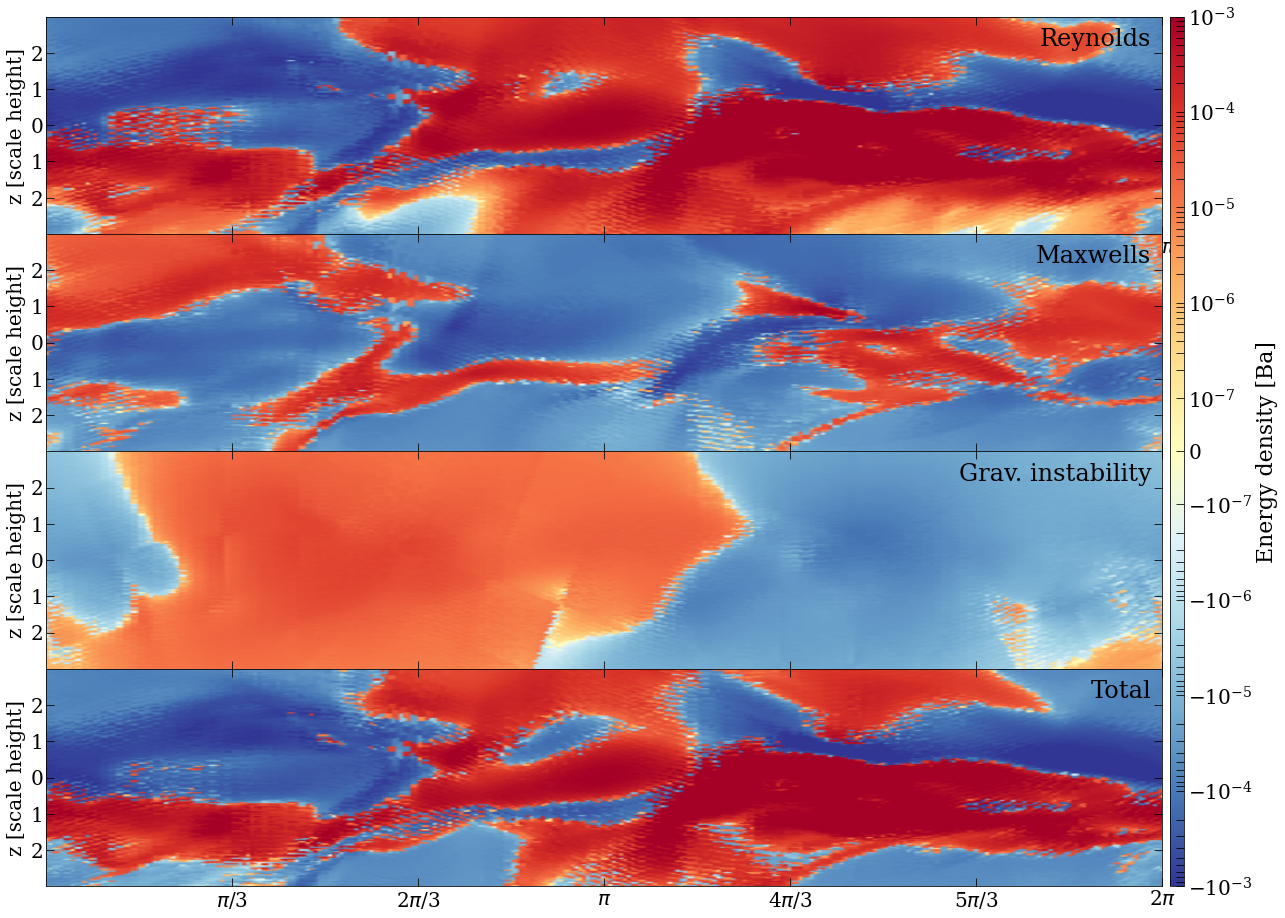

In [18]:
min = -1e-3; max = 1e-3

fig, axs = plt.subplots(4,1, figsize = (20,16))

for ax in axs.flatten():
    ax.set(ylabel = 'z [scale height]', xlim = (0, 2*np.pi))


tick_labels = ['$\pi$/3','2$\pi$/3','$\pi$', '4$\pi$/3', '5$\pi$/3', '2$\pi$']
tick_values = [np.pi/3, 2*np.pi/3, np.pi, np.pi/3 + np.pi, 2*np.pi/3 + np.pi, 2*np.pi]

for ax in axs.flatten()[1:3]:
    ax.set_xticklabels([]), ax.set_xticks(tick_values)


for i in [0, -1]:
    ax = axs.flatten()[i]
    ax.set_xticks(tick_values); ax.set_xticklabels(tick_labels); 

for ax, stress, name in zip(axs.flatten(), [R_r, M_r, G_r, total_r], stress_names):

    ax.set_yticks(np.arange(-2,3,1) * H)
    ax.set_yticklabels(['2', '1', '0', '1', '2'])

    cs = ax.pcolormesh(radial_phi, radial_z * data.au_length, stress.T, norm = colors.SymLogNorm(linthresh=1e-7, linscale=0.5, vmin = min, vmax = max), 
                       snap = True, shading = 'gouraud', cmap = 'RdYlBu_r')
    ax.text(0.99, 0.95, name, transform=ax.transAxes, ha='right', va='top', fontsize = 24)

cbaxes = fig.add_axes([0.905, 0.125, 0.01, 0.755])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.set_label('Energy density [Ba]',fontsize = 22)

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig(save_folder + 'radialstress_13_26kyr', facecolor = 'w', bbox_inches='tight', dpi = 500)

In [19]:
vertical_phi = stress_data['vertical_phi']
vertical_r = stress_data['vertical_r']

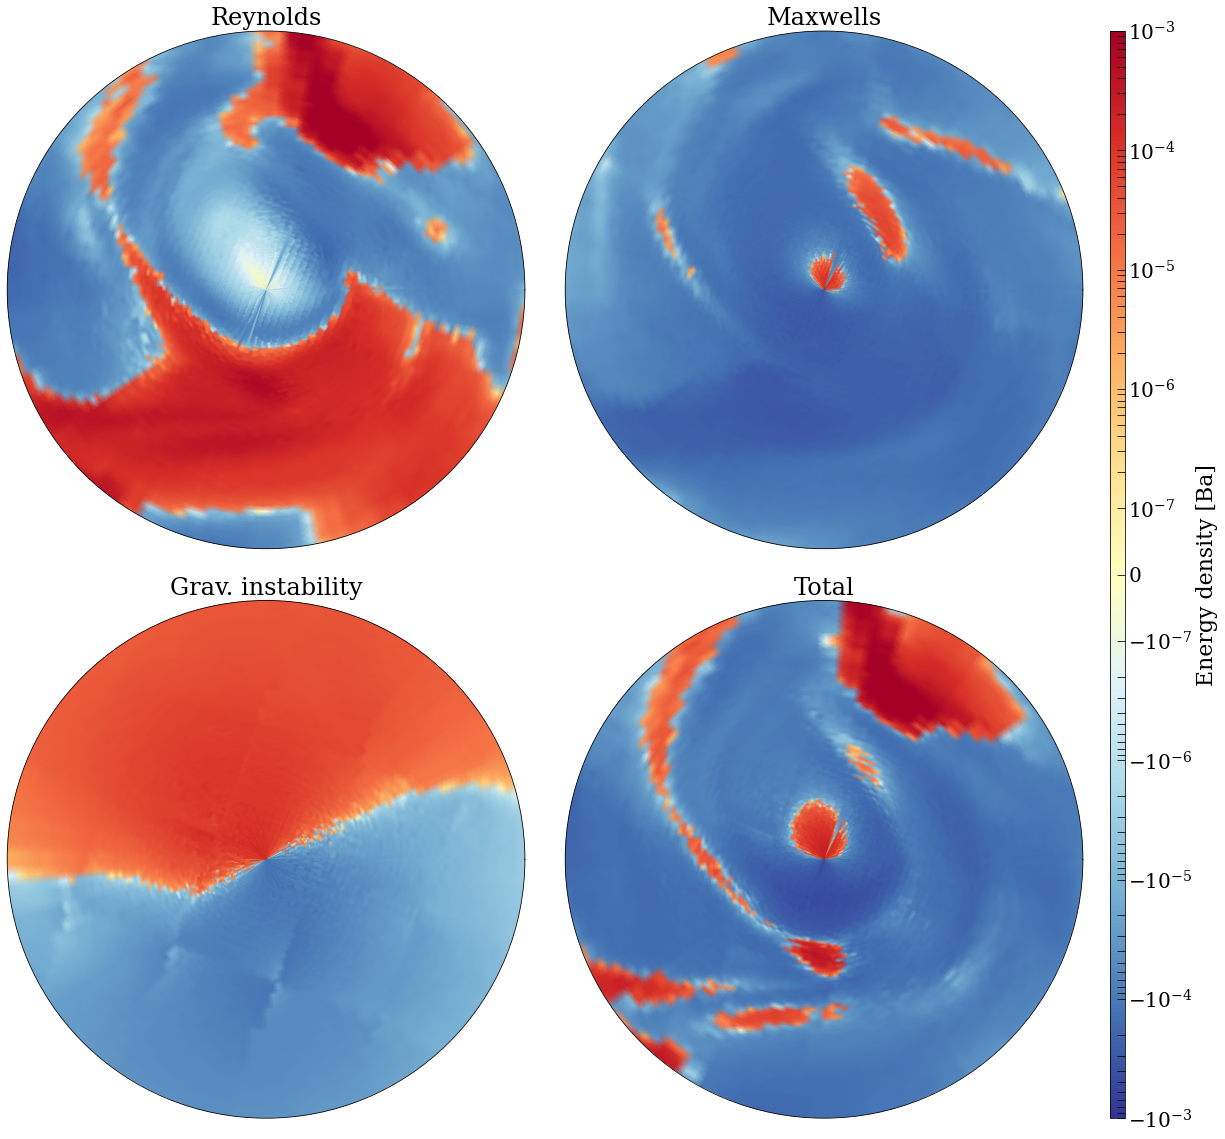

In [20]:
fig, axs = plt.subplots(2,2, figsize = (20,20), subplot_kw={'projection' :'polar'})

for ax in axs.flatten():
    ax.set_xticks([]); ax.set_xticklabels([])
    ax.set_yticks([])


for ax, stress, name in zip(axs.flatten(), [R_v, M_v, G_v, total_v], stress_names):
    cs = ax.pcolormesh(vertical_phi, vertical_r * data.au_length, stress.T, norm = colors.SymLogNorm(linthresh=1e-7, linscale=0.5, vmin = min, vmax = max), 
                        snap = True, shading = 'gouraud', cmap = 'RdYlBu_r')
    ax.set(title = name)

fig.subplots_adjust(wspace=0, hspace=0.1)

cbaxes = fig.add_axes([0.905, 0.125, 0.01, 0.755])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.set_label('Energy density [Ba]',fontsize = 22)

plt.savefig(save_folder + 'verticalstress_13_26kyr', facecolor = 'w', bbox_inches='tight', dpi = 500)